# Install libraries

In [1]:
!pip install nltk
!pip install underthesea

In [2]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Data

In [40]:
import pandas as pd
data = pd.read_csv('dataset.csv')

In [41]:
data.tail(10)

,sentiment,vi_review
6423,negative,Cuối tuần đi học áp lực x2
6424,positive,cứ phải đi qua những ngày mưa thì mới thấy quý...
6425,negative,Kiểu gì cũng phải qua thanh minh thì mới nắng ...
6426,negative,Xong tin buồn lại một đợt rét nữa ..
6427,positive,yeahh
6428,positive,Nguyễn Nga yeahh
6429,positive,Thanh Nga
6430,negative,2-3 ngày cũng sắp cởi chuồng r
6431,positive,Ngw Tùng Anh nhanh về quét nhà
6432,positive,Thích cá haha


In [42]:
data.shape

(6433, 2)

# Remove Duplicates

In [43]:
def remove_duplicates(df):
    df.drop_duplicates(subset=['vi_review', 'sentiment'], inplace=True)
remove_duplicates(data)

In [44]:
data.shape

(5363, 2)

# Lowering the Text

In [45]:
data['vi_review']= data['vi_review'].apply(lambda x: x.lower())
data.head()

,sentiment,vi_review
0,positive,rất hay
1,positive,cam on a.
2,positive,rất là hay cảm on bạn thumbs-up thumbs-up sm...
3,positive,rất ý nghĩa bạn ơi
4,positive,"đúng là từng câu, từng chữ từng lời mà cả đời ..."


# Remove URL

In [46]:
import re
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    clean_text = re.sub(url_pattern, '', text)
    return clean_text
data['vi_review'] = data['vi_review'].apply(remove_urls)
data.head()

,sentiment,vi_review
0,positive,rất hay
1,positive,cam on a.
2,positive,rất là hay cảm on bạn thumbs-up thumbs-up sm...
3,positive,rất ý nghĩa bạn ơi
4,positive,"đúng là từng câu, từng chữ từng lời mà cả đời ..."


# Remove Punctuation

In [47]:
import string
string.punctuation
def remove_punctuation(text):
    specific_punctuation = "~!@#$%^&*?|{}"
    punctuationfree="".join([i for i in text if i not in specific_punctuation])
    return punctuationfree
data['vi_review']= data['vi_review'].apply(lambda x:remove_punctuation(x))
data.head()

,sentiment,vi_review
0,positive,rất hay
1,positive,cam on a.
2,positive,rất là hay cảm on bạn thumbs-up thumbs-up sm...
3,positive,rất ý nghĩa bạn ơi
4,positive,"đúng là từng câu, từng chữ từng lời mà cả đời ..."


# Remove Stopwords

In [49]:
import underthesea
from underthesea import word_tokenize
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = [name.strip().lower() for name in file]
def remove_stopwords_from_text(text):
    words = word_tokenize(text)
    clean_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(clean_words)

data['vi_review'] = data['vi_review'].apply(remove_stopwords_from_text)
data.head()

,sentiment,vi_review
0,positive,
1,positive,cam on a .
2,positive,cảm on thumbs-up thumbs-up smiling-face-with-h...
3,positive,ý nghĩa
4,positive,"câu , chữ đời tâm đắc"


# Privacy Reduction

In [50]:
from underthesea import word_tokenize

def replace_names(sentence, names_list):
    words = word_tokenize(sentence)
    replaced_words = ['<someone>' if word.lower() in names_list else word for word in words]
    replaced_sentence = ' '.join(replaced_words)
    return replaced_sentence
with open('names.txt', 'r', encoding='utf-8') as file:
    names_list = [name.strip().lower() for name in file]
data['vi_review'] = data['vi_review'].apply(lambda x: replace_names(x, names_list))
# Example
sentence = 'Bích Loan nghỉ học'
replaced_sentence = replace_names(sentence, names_list)
print(replaced_sentence)


<someone> nghỉ học


In [51]:
data.head(5)

,sentiment,vi_review
0,positive,
1,positive,cam on a .
2,positive,cảm on thumbs-up thumbs-up smiling-face-with-h...
3,positive,ý nghĩa
4,positive,"câu , chữ đời tâm đắc"


In [52]:
import numpy as np
data.replace('', np.nan, inplace=True)
data.dropna(subset=['vi_review'], inplace=True)
data = data.reset_index(drop=True)

In [53]:
data.head(10)

,sentiment,vi_review
0,positive,cam on a .
1,positive,cảm on thumbs-up thumbs-up smiling-face-with-h...
2,positive,ý nghĩa
3,positive,"câu , chữ đời tâm đắc"
4,positive,ah
5,positive,tuyệt vời . câu chuyện tích cực smiling-face-w...
6,positive,ấm áp
7,positive,cám ơn đẹp tuyệt vời
8,positive,tuyệt vời lắm cám ơn nha smiling-face-with-hea...
9,positive,smiling-face-with-hearts smiling-face-with-hea...


In [54]:
data.shape

(5285, 2)

# Save the Dataset

In [25]:
data.to_csv('dataset.csv')

# Visualize Data

In [29]:
df = pd.read_csv('dataset.csv')

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

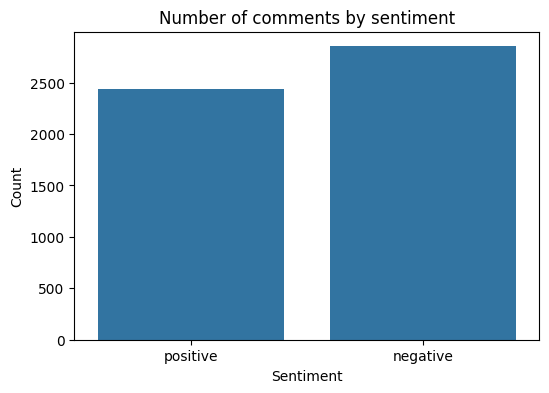

In [36]:
# Bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Number of comments by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

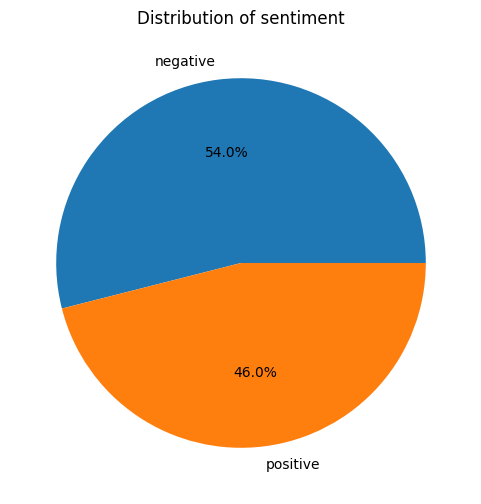

In [37]:
# Pie chart
plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of sentiment')
plt.ylabel('')
plt.show()

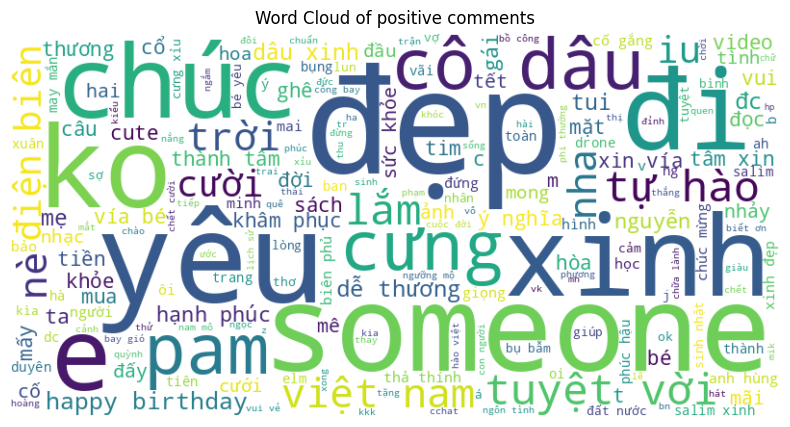

In [38]:
# Word Cloud
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['vi_review'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of positive comments')
plt.axis('off')
plt.show()

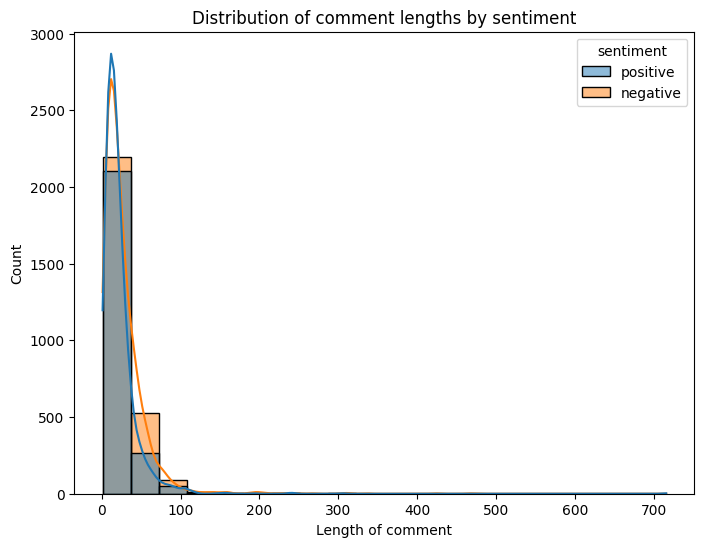

In [39]:
# Histogram of comment lengths
df['length'] = df['vi_review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='length', hue='sentiment', kde=True, bins=20)
plt.title('Distribution of comment lengths by sentiment')
plt.xlabel('Length of comment')
plt.ylabel('Count')
plt.show()